# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

## Гипотеза №1

In [27]:
# Импортируем нужные библиотеки
import psycopg2
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# Создаем подключение к базе данных
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}

conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
# посмотрим, какие таблицы есть в бд
sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
cursor.execute(sql_str)
tables_data = [a for a in cursor.fetchall()]
conn.commit()

print("какие таблицы есть в бд: %s" % tables_data)

какие таблицы есть в бд: [('hr_dataset',), ('production_staff',), ('male',), ('female',), ('recruiting_costs',), ('hr_dataset_view',), ('numb_of_hire',), ('numb_of_terms',), ('salary_grid',), ('days_work',), ('show_functions',), ('abu_pay',), ('abupay1',), ('share_employee_source',), ('tmpDB',), ('abupay',), ('contacts',)]


In [28]:
# Создал датафрейм, для просмотра названий колонок.
df_hr = pd.read_sql_query("SELECT * FROM public.hr_dataset LIMIT 5;", conn)
df_hr

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [29]:
# Проверяем, есть зависимость между perfomance score и тем, под чьим руководством работает сотрудник.

# Создаю подключение к базе
conn = psycopg2.connect(**pg_connection)
# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос к базе данных, в которых выбираю имена менеджеров, оценку производительности и их кол-во из таблицы hr_dataset
sql_str = 'SELECT "Manager Name", "Performance Score", COUNT(*) FROM public.hr_dataset GROUP BY "Manager Name", "Performance Score";'
# извлекаю запрос
cursor.execute(sql_str)
# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()
# Сохранил изменения
conn.commit()
# Закрываем подключение к бд
conn.close()

In [30]:
# Создаю пустой словарь
perf_dict= {}
# Наполняем пустой словарь ключами из имен менеджеров
[perf_dict.update({x[0]:{}}) for x in newlist]
perf_dict

{'Amy Dunn': {},
 'Lynn Daneault': {},
 'Webster Butler': {},
 'David Stanley': {},
 'Simon Roup': {},
 'Brannon Miller': {},
 'Brandon R. LeBlanc': {},
 'Kissy Sullivan': {},
 'Ketsia Liebig': {},
 'Eric Dougall': {},
 'Elijiah Gray': {},
 'Kelley Spirea': {},
 'Janet King': {},
 'Michael Albert': {},
 'Peter Monroe': {},
 'Alex Sweetwater': {},
 'Jennifer Zamora': {},
 'John Smith': {},
 'Board of Directors': {},
 'Debra Houlihan': {},
 'Brian Champaigne': {}}

In [31]:
# Запускаем цикл по данным  полученным из базы данных
for row in newlist:
    name = row[0]
    perf_score = row[1]
    count = row[2]
    perf_dict[name].update({perf_score:count})

Text(0, 0.5, 'Manager Name')

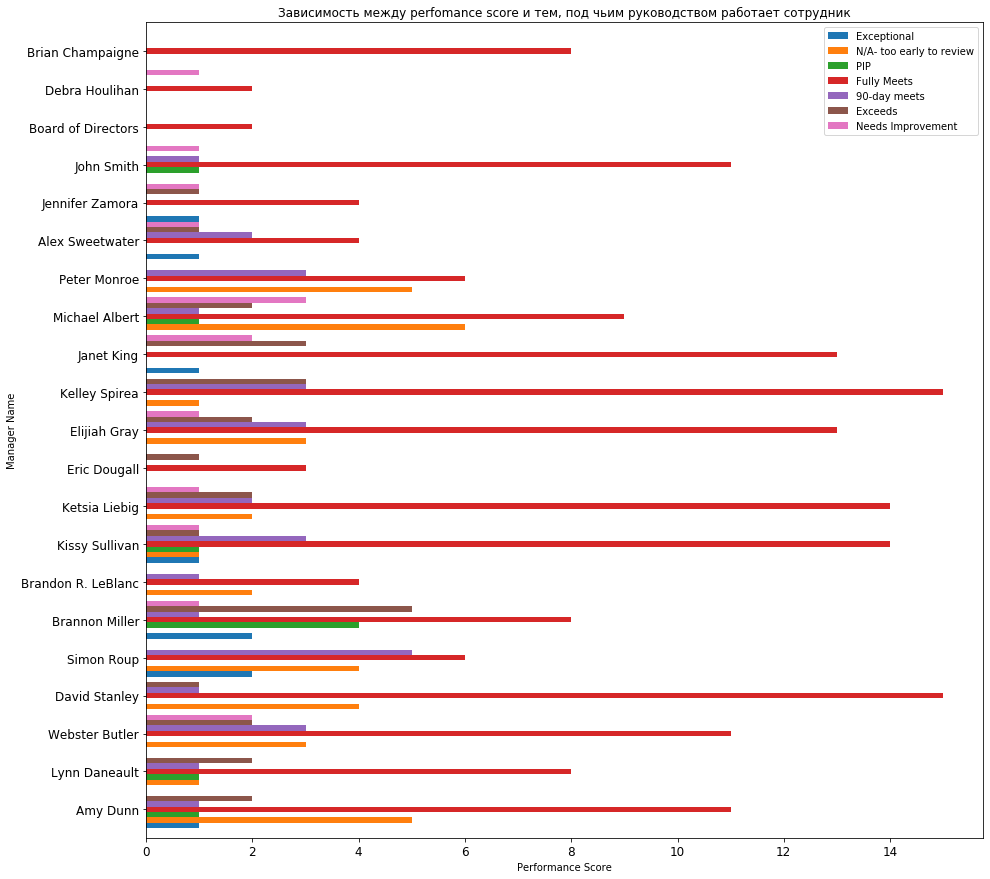

In [32]:
# Преобразую словарь в датафрейм
df_perf_score = pd.DataFrame(perf_dict).T

# Из полученных данных, создаю график
ax = df_perf_score.plot.barh(fontsize=12, figsize=(15,15), width=1, title='Зависимость между perfomance score и тем, под чьим руководством работает сотрудник')
ax.set_xlabel("Performance Score")
ax.set_ylabel("Manager Name")

## Вывод:
Исходя из графика, мы видем следующее:

1. Практически у всех менеджеров большинство сотрудников полностью соответствуют требованиям

2. У Michael Albert показатели сторудников не соответсвует текущим требованиям

3. Косаемо гипотезы, можно сделать следующий вывод, как видно на графике у Brian Champaigne сотрудники полностью соответсвовали всем требованиям, и на основании его показателей можно утерждать, что есть зависимость между perfomance score и тем, под чьим руководством работает сотрудник.

## Гипотеза №2

In [33]:
# Создаю подключение к базе
conn = psycopg2.connect(**pg_connection)
# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос к базе данных
sql_str = 'SELECT "maritalstatusid", percentile_disc(0.5) within group (order by public.hr_dataset."Days Employed") from public.hr_dataset GROUP BY "maritalstatusid"'
# извлекаю запрос
cursor.execute(sql_str)
# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()
# Сохранил изменения
conn.commit()
# Закрываем подключение к бд
conn.close()

Text(0, 0.5, 'maritalstatusid')

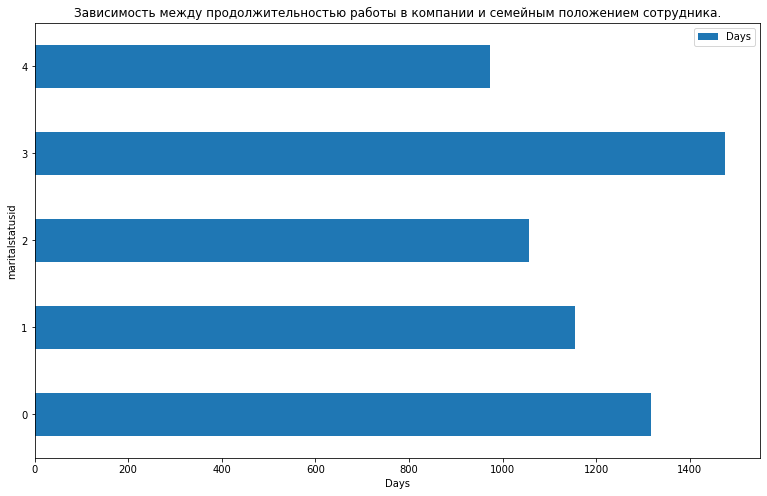

In [34]:
# Создаю датафрейм из полученных в запросе данных
df = pd.DataFrame(newlist, columns=['maritalstatusid', 'Days']).set_index('maritalstatusid')

ax = df.plot.barh(figsize=(13, 8), title='Зависимость между продолжительностью работы в компании и семейным положением сотрудника.')

ax.set_xlabel("Days")
ax.set_ylabel("maritalstatusid")

## Вывод по графику №1:
Как видно из графика, в большинстве случаев дольше всех работает категория людей, котрые были трижды в браке.

In [36]:
# Создаю подключение к базе
conn = psycopg2.connect(**pg_connection)
# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос к базе данных
sql_str = 'SELECT "marriedid", percentile_disc(0.5) within group (order by public.hr_dataset."Days Employed") from public.hr_dataset GROUP BY "marriedid"'
# извлекаю запрос
cursor.execute(sql_str)
# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()
# Сохранил изменения
conn.commit()
# Закрываем подключение к бд
conn.close()

Text(0, 0.5, 'marriedid')

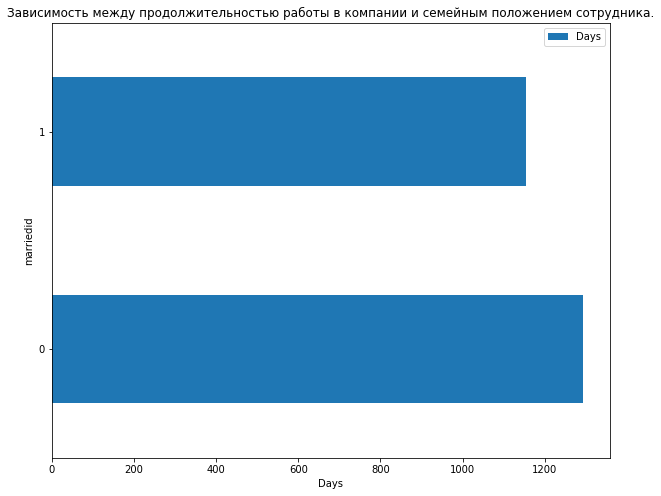

In [37]:
# Создаю датафрейм из полученных в запросе данных
df = pd.DataFrame(newlist, columns=['marriedid', 'Days']).set_index('marriedid')

ax = df.plot.barh(figsize=(10, 8), title='Зависимость между продолжительностью работы в компании и семейным положением сотрудника.')
ax.set_xlabel("Days")
ax.set_ylabel("marriedid")

## Вывод по графику №2:
Как видно из графика №2, при детальном анализе, на  150 дней проработали больше сотрудники, которые не были в браке.
Из 2 показателей графиков, можно сделать вывод, что гипотеза полностью подтвердилась, что есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.

## Гипотеза №3

In [38]:
# Создаю подключение к базе
conn = psycopg2.connect(**pg_connection)
# Создаю объект курсора
cursor = conn.cursor()

# Создаю запрос к базе данных
sql_str = 'select "age", percentile_disc(0.5) within group (order by public.hr_dataset."Days Employed") as days from public.hr_dataset GROUP BY "age" ORDER BY days'
# извлекаю запрос
cursor.execute(sql_str)
# Все данные полученные из запроса присваиваю переменной
newlist = cursor.fetchall()
# Сохранил изменения
conn.commit()
# Закрываем подключение к бд
conn.close()

Text(0, 0.5, 'Age')

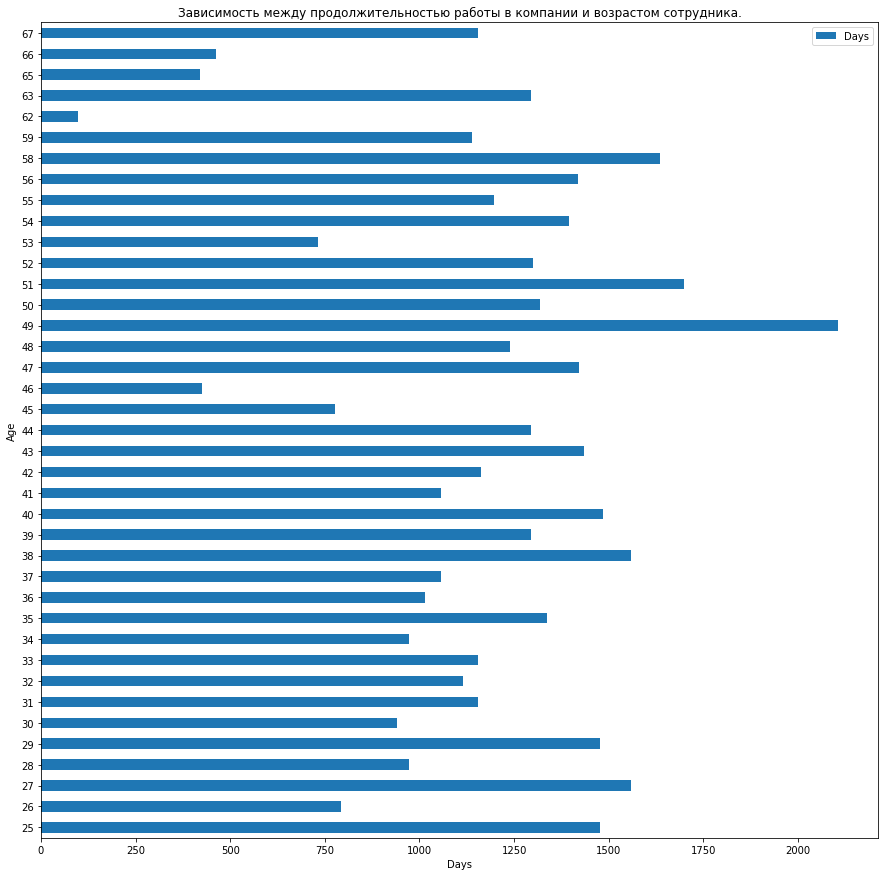

In [39]:
df = pd.DataFrame(newlist, columns=['Age', 'Days']).set_index('Age').sort_index()

ax = df.plot(kind='barh', figsize=(15,15), title='Зависимость между продолжительностью работы в компании и возрастом сотрудника.')

ax.set_xlabel("Days")
ax.set_ylabel("Age")

## Вывод по графику:
Исходя из графика, дольше всех проработала категория возраста, кому за 49 лет. На мой взгляд, есть зависимость между продолжительностью работы в компании и возрастом сотрудника.
Соответсвенно, данная гипотеза так же подтвердилась.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [46]:
import requests

# Создал функцию которая извлекает json из спарсенных данных.
def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

# в данную переменную необходимо передать свой 'Сервисный ключ доступа', иначе скрип не сработает.
vk_token = #Token vk

In [53]:
# Получаю последние 100 записей из паблика Skillbox Вконтакте
# Данную выборку взял 100 последних постов, для анализа более свежой информации.
dict = {}

for i in range(100):
    dict[i] = {}
    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + f'&owner_id=-66669811&offset={i}&count=100&v=5.52'
    response = getjson(url)
    
    text = response['response']['items'][0]['text']
    likes = response['response']['items'][0]['likes']['count']
    reposts = response['response']['items'][0]['reposts']['count']
    
    date = response['response']['items'][0]['date']
    dt = (datetime.fromtimestamp(date) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')
    
    dict[i].update({'text':text,
                        'likes':likes,
                        'reposts':reposts,
                        'time':dt
                       
                       
                       
                       })

    print()
    print('Текст: ', text)
    print()
    print('Лайков: ', likes)
    print('Репостов: ', reposts)
    print('Время публикации: ', dt)
    print('*' * 40)


Текст:  Этими инструментами можно создать сайт своими руками, без дизайна и программирования.

#Статья_Skillbox

Лайков:  20
Репостов:  0
Время публикации:  2020-07-21 19:50:14
****************************************

Текст:  Ждете новую лекцию цикла «Дизайн, философия и киборги»? 

Спешим обрадовать: она пройдет уже 22 июля в 19:00! 
Серж Степанищев расскажет о творчестве американского скульптора, арт-критика, основателя образовательного ресурса UbuWeb и поэта Кеннета Голдсмита. 

Подписывайтесь на бесплатный мини-курс и смотрите лекцию в прямом эфире. Начало — по московскому времени: https://vk.cc/axexhj

#Skillbox_Дизайн

Лайков:  6
Репостов:  1
Время публикации:  2020-07-21 17:06:25
****************************************

Текст:  Тренировка для дизайнеров!

Мы подготовили плакат, в котором намеренной допустили много ошибок в дизайне. Ваша задача — найти их и объяснить в комментариях, что не так. Вечером опубликуем список допущенных промахов и покажем, как надо было сверстать пл

In [55]:
# Преобразуем выше полученные данные в датафрейм 
import pandas as pd
df = pd.DataFrame(dict)
pd.options.display.max_colwidth = 200
df.T.sort_values(['likes', 'reposts'], ascending=[False, False]).set_index('time').sort_index()

,text,likes,reposts
time,,,
2020-05-31 14:22:41,"Готовы продолжить изучать HTML? Тогда ловите новый комплект тегов!\n\nПишите в комментариях, если хотите чаще видеть эту рубрику.\nА пока смотрите карточки!\n\n#Учим_HTML #Skillbox_программирование",252,33
2020-06-01 14:35:12,"Писать код силой мысли, создавать крутой моушен-дизайн за несколько секунд, генерировать по сотне креативных идей в день. А какую суперспособность хотели бы вы?\n\nУ сегодняшнего именинника Суперм...",66,0
2020-06-01 20:54:29,"С первым днем лета, друзья! На этой неделе приготовили много жарких интенсивов😏 Научим вас 50-ти секретным приемам для привлечения клиентов, расскажем, как перестать бояться и полюбить DevOps, и в...",55,2
2020-06-01 22:00:50,"Питера Друкера называют отцом современного менеджмента — а ведь он даже не был менеджером! Объясняем в карточках, кто это вообще такой и что же он сделал в далёком 1946 году, что это до сих пор в ...",60,8
2020-06-02 15:47:51,"Наши коллеги и партнеры Red Collar везут в Воронеж одну из самых значимых digital-премий в мире — кубок The Webby Awards! Для тех, кто не в курсе — это «Оскар» в сфере дизайна. \n\nИх эко-сайт «С...",93,3
...,...,...,...
2020-07-20 17:12:16,"Готовы к новым знаниям? Неделя будет очень интенсивной! Мы расскажем о креативе в SMM, сделаем анимированный ролик, разработаем чат-бота с искусственным интеллектом, научимся поднимать конверсию л...",29,1
2020-07-20 20:28:34,"Полагаете, что “свободные” программы - это всегда бесплатно, с открытым кодом, и, в основном, для начинающих? Ничего подобного. \n\n#Статья_Skillbox",15,1
2020-07-21 13:13:17,"Тренировка для дизайнеров!\n\nМы подготовили плакат, в котором намеренной допустили много ошибок в дизайне. Ваша задача — найти их и объяснить в комментариях, что не так. Вечером опубликуем список...",27,2


In [62]:
# Сортируем по данные по возрастанию, и удаляем пустые значения. 
df = df.T
df = df.dropna()
df[df.likes > df.likes.median()].sort_values('likes', ascending=False)

,text,likes,reposts,time
34,Компания Pentatonic давно известна своим желанием избавить планету от мусора и навсегда решить проблему утилизации отходов.\n\nОни уже создавали стильную офисную мебель из пластиковых и алюминиевы...,377,13,2020-07-05 16:04:07
74,"Любите устраивать перестановки в комнате? Похоже, вы прирожденный дизайнер интерьеров. Но пожалейте соседей — направьте свою энергию в игры! А мы уже для вас и подборку сделали — смотрите в карточ...",319,26,2020-06-15 17:38:32
47,Сегодня свой 49-й день рождения отмечает генеральный и гениальный директор Space X и Tesla Илон Маск. \nМесяц назад его детище SpaceX Crew Dragon стало первым частным пилотируемым космическим кора...,298,27,2020-06-28 13:26:48
86,"Ёлки-лапки!\n\nВы знаете, в каких языках используются кавычки-ёлочки? Где они бывают одинарными или направленными внутрь? Почему обе пары кавычек-лапок иногда пишутся вверху строки?\n\nЖурнал Type...",267,33,2020-06-07 17:26:59
99,"Готовы продолжить изучать HTML? Тогда ловите новый комплект тегов!\n\nПишите в комментариях, если хотите чаще видеть эту рубрику.\nА пока смотрите карточки!\n\n#Учим_HTML #Skillbox_программирование",252,33,2020-05-31 14:22:41
23,"Пока вы думали, как собрать средства на реализацию своего проекта, мы собрали для вас топ краудфандинговых площадок. Они не только помогут профинансировать вашу работу, но и покажут, насколько хор...",250,54,2020-07-10 14:55:52
27,— После стольких лет?\n— Всегда!\n\nК 20-летию первой публикации «Гарри Поттера» в Литве художница из Вильнюса Екатерина Будрите (@jekaterina_budryte) нарисовала альтернативные обложки ко всем час...,224,13,2020-07-08 15:17:51
68,"Как подчеркнуть в тексте нужную эмоцию, если в нашем арсенале только восклицательный и вопросительный знаки? А что делать с иронией, сарказмом и другими нюансами? Веками типографы разрабатывали но...",220,29,2020-06-18 13:26:03
80,"Сегодня делимся удивительными иллюстрациями ирландского художника @cathalduane. \n\nГротеск в сочетании с яркой палитрой создает ощущение иллюзорности, деформирует представление о перспективе и ди...",192,7,2020-06-11 15:54:27
61,"Какая ваша любимая асана для учебы или работы?\nДолго сидеть за столом или лежать с ноутбуком не рекомендуется — это вредно для позвоночника. Потому многие известные компании, такие как Google, Mi...",184,23,2020-06-21 13:01:07


## Вывод: ##

## Как видно выше из таблице, в топ 3 попали 3 поста: ##
## 1. 1 почетное место, занял пост про экологию: "Компания Pentatonic давно известна своим желанием избавить планету от мусора и навсегда решить проблему утилизации отходов." ##
Даннй пост лайкнули 377 пользователей группы, поделились постом 33 участника группы. На текущий момент многих волнует данная проблема, поэтому данная тема очень поплярна во всем мире.
## 2. 2 место по популярности  занял пост по дизайну:"Любите устраивать перестановки в комнате? Похоже, вы прирожденный дизайнер интерьеров. Но пожалейте соседей — направьте свою энергию в игры!" ##
Дизайн так и не потерял своей популярности, курсы по дизайну очень популярные среди пользователей. Данный пост лайкнули 319 пользователей группы, поделились постом 26 учасников группы.
## 3. 3 место занял пост про космос: Сегодня свой 49-й день рождения отмечает генеральный и гениальный директор Space X и Tesla Илон Маск. ##
Данное событие действительно взарволо мир, 1 частный космический корабль был запушен в космос. Данный пост лайкнули 298 пользователей группы, поделились постом 27 учасников группы.



In [65]:
# Собираем данные по хештегам из постов
import re
pattern = r'#\w*'

list_news = ', '.join(map(str, df.text.values))
hashtags = re.findall(pattern, list_news)
# Создаю сортированный список уникальных хештегов 
unique_hashtags = sorted(list(set(hashtags)))[1:]

In [68]:
# Собираем сводную статкистику по хештегам, минимальное, максимальное, среднее, медианное значения лайков и репостов.
hashtag_dict = {}
for i in unique_hashtags:
    hashtag_dict[i] = {'post_count':df[df.text.str.contains(i, regex=False)].likes.count(),
                       
                       'likes_min':df[df.text.str.contains(i, regex=False)].likes.min(),
                       'reposts_min':df[df.text.str.contains(i, regex=False)].reposts.min(),
                       
                       'likes_max':df[df.text.str.contains(i, regex=False)].likes.max(),
                       'reposts_max':df[df.text.str.contains(i, regex=False)].reposts.max(),

                       
                       'likes_mean':df[df.text.str.contains(i, regex=False)].likes.mean(),
                       'reposts_mean':df[df.text.str.contains(i, regex=False)].reposts.mean(),
                       
                       'likes_median':df[df.text.str.contains(i, regex=False)].likes.median(),
                       'reposts_median':df[df.text.str.contains(i, regex=False)].reposts.median(),
                     
}

In [69]:
hashtag_dict

{'#Game_of_jobs': {'post_count': 1,
  'likes_min': 53,
  'reposts_min': 5,
  'likes_max': 53,
  'reposts_max': 5,
  'likes_mean': 53.0,
  'reposts_mean': 5.0,
  'likes_median': 53.0,
  'reposts_median': 5.0},
 '#SMDay': {'post_count': 1,
  'likes_min': 68,
  'reposts_min': 1,
  'likes_max': 68,
  'reposts_max': 1,
  'likes_mean': 68.0,
  'reposts_mean': 1.0,
  'likes_median': 68.0,
  'reposts_median': 1.0},
 '#Skillbox_Дизайн': {'post_count': 8,
  'likes_min': 6,
  'reposts_min': 1,
  'likes_max': 144,
  'reposts_max': 19,
  'likes_mean': 78.375,
  'reposts_mean': 8.875,
  'likes_median': 87.0,
  'reposts_median': 8.5},
 '#Skillbox_Маркетинг': {'post_count': 2,
  'likes_min': 44,
  'reposts_min': 4,
  'likes_max': 82,
  'reposts_max': 20,
  'likes_mean': 63.0,
  'reposts_mean': 12.0,
  'likes_median': 63.0,
  'reposts_median': 12.0},
 '#Skillbox_Программирование': {'post_count': 5,
  'likes_min': 38,
  'reposts_min': 0,
  'likes_max': 56,
  'reposts_max': 10,
  'likes_mean': 47.0,
  'r

In [70]:
pd.DataFrame(hashtag_dict).T.sort_values(['likes_median', 'reposts_median'],  ascending=[False, False])

,post_count,likes_min,reposts_min,likes_max,reposts_max,likes_mean,reposts_mean,likes_median,reposts_median
#skillbox_дизайн,1.0,319.0,26.0,319.0,26.0,319.000000,26.000000,319.0,26.0
#в_закладки_skillbox,1.0,319.0,26.0,319.0,26.0,319.000000,26.000000,319.0,26.0
#Упаковка_Skillbox,2.0,73.0,5.0,377.0,13.0,225.000000,9.000000,225.0,9.0
#Иллюстрация_Skillbox,1.0,224.0,13.0,224.0,13.0,224.000000,13.000000,224.0,13.0
#Иллюстрации,1.0,192.0,7.0,192.0,7.0,192.000000,7.000000,192.0,7.0
#Учим_HTML,2.0,104.0,11.0,252.0,33.0,178.000000,22.000000,178.0,22.0
#Skillboxпрограммирование,1.0,177.0,31.0,177.0,31.0,177.000000,31.000000,177.0,31.0
#Советпрепода_Skillbox,1.0,177.0,31.0,177.0,31.0,177.000000,31.000000,177.0,31.0
#В_Закладки_Skillbox,7.0,52.0,7.0,298.0,33.0,164.714286,20.714286,162.0,23.0
#Skillbox_вдохновляет,2.0,99.0,4.0,224.0,13.0,161.500000,8.500000,161.5,8.5


## Вывод:##

Из полученного выше датафрейме видно, что больше всего лайков получила статья с хештегом "#skillbox_дизайн", это еще раз доказывает, что курсы по дизайну на сегодняйший день очень популярены. Меня очень огорчает, что программирование не занимает первую строчку по популярности.
